Matplotlib is building the font cache; this may take a moment.


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

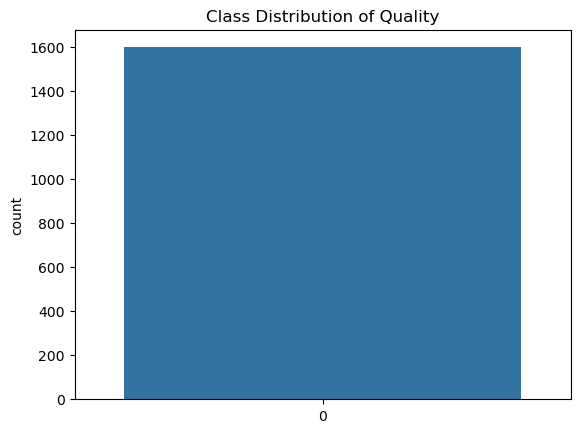

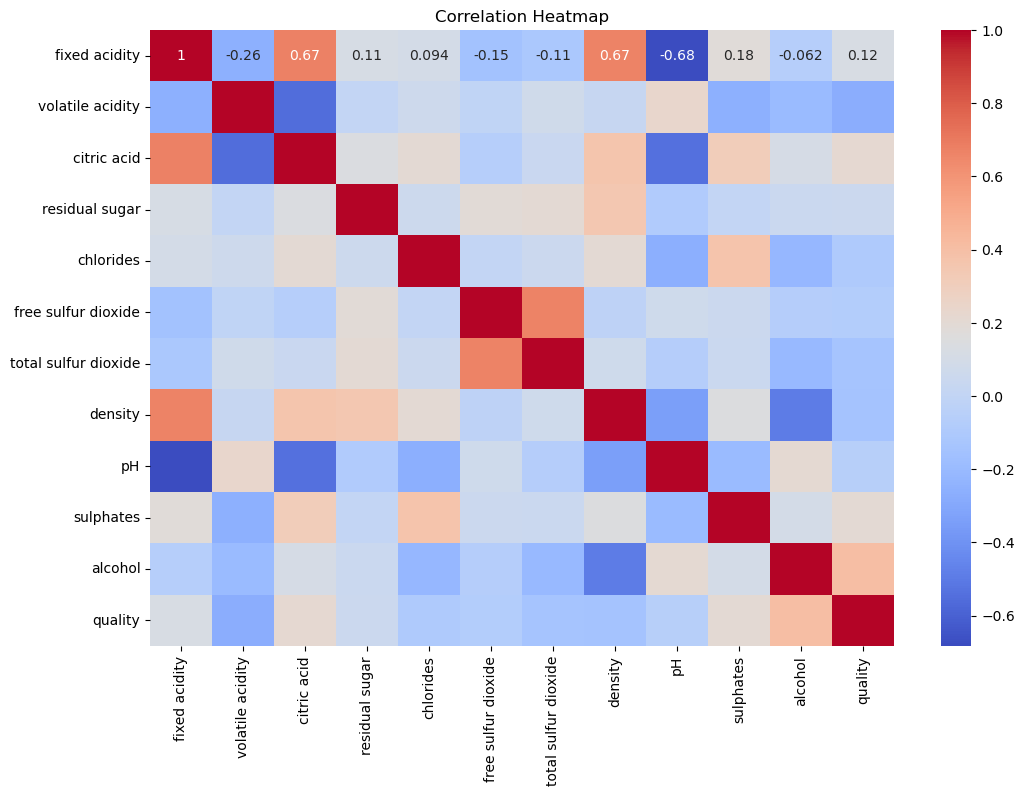

                 Feature       Score
10               alcohol  317.650903
1       volatile acidity  126.290916
2            citric acid   77.184567
9              sulphates   66.185378
7                density   36.990465
6   total sulfur dioxide   31.702481
0          fixed acidity   23.356885
4              chlorides   15.266188
5    free sulfur dioxide    8.263373
8                     pH    5.257619
3         residual sugar    3.654017

Model: Logistic Regression
Accuracy: 0.89375
ROC AUC: 0.8802787339434137
Confusion Matrix:
 [[270   7]
 [ 27  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.70      0.37      0.48        43

    accuracy                           0.89       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.88      0.89      0.88       320


Model: Decision Tree
Accuracy: 0.89375
ROC AUC: 0.81093107211821
Confusion Matrix:
 [[25

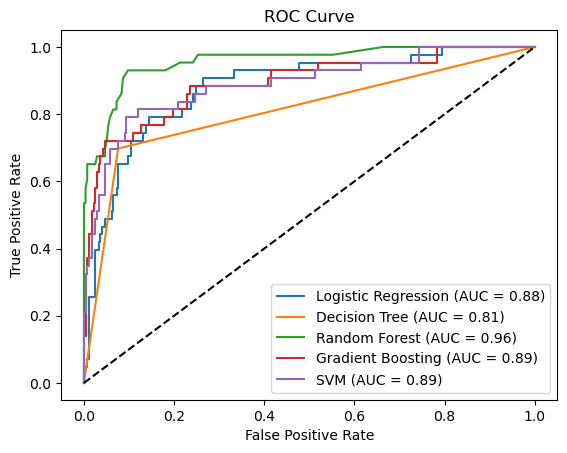

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best AUC Score: 0.8362644967489258

Tuned Decision Tree
Accuracy: 0.89375
ROC AUC: 0.8622281924271682
Confusion Matrix:
 [[271   6]
 [ 28  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.71      0.35      0.47        43

    accuracy                           0.89       320
   macro avg       0.81      0.66      0.70       320
weighted avg       0.88      0.89      0.88       320


Tuned Decision Tree
Accuracy: 0.89375
ROC AUC: 0.8622281924271682
Confusion Matrix:
 [[271   6]
 [ 28  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.71      0.35      0.47        43

    accuracy                           0.89       320
   macro avg       0.81      0.66      0.70       320
weighted avg      

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings
#Loading the dataset
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/winequality-red.csv"
data = pd.read_csv(url)

# Check the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Basic statistics
print(data.describe())
#binary classification: 1 for 'good' (>=7), 0 for 'not good' (<7)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Check class distribution
sns.countplot(data['quality'])
plt.title('Class Distribution of Quality')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Split data into features and target
X = data.drop('quality', axis=1)
y = data['quality']

# Feature selection using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(feature_scores.sort_values(by='Score', ascending=False))
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}

# Models trainung and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
# Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)
# Evaluate the tuned Decision Tree
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nTuned Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Evaluate the tuned Decision Tree
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nTuned Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
